b'Skipping line 259: expected 2 fields, saw 3\nSkipping line 840: expected 2 fields, saw 3\nSkipping line 1261: expected 2 fields, saw 4\nSkipping line 1925: expected 2 fields, saw 3\nSkipping line 2726: expected 2 fields, saw 7\nSkipping line 3163: expected 2 fields, saw 3\nSkipping line 3825: expected 2 fields, saw 3\nSkipping line 4020: expected 2 fields, saw 3\nSkipping line 4153: expected 2 fields, saw 3\nSkipping line 4858: expected 2 fields, saw 3\nSkipping line 5051: expected 2 fields, saw 4\nSkipping line 5157: expected 2 fields, saw 3\nSkipping line 5235: expected 2 fields, saw 3\nSkipping line 6046: expected 2 fields, saw 3\nSkipping line 6390: expected 2 fields, saw 3\nSkipping line 6391: expected 2 fields, saw 3\nSkipping line 6498: expected 2 fields, saw 3\nSkipping line 6604: expected 2 fields, saw 5\nSkipping line 7125: expected 2 fields, saw 3\nSkipping line 7323: expected 2 fields, saw 3\nSkipping line 7894: expected 2 fields, saw 5\nSkipping line 8024: expected 2 fie

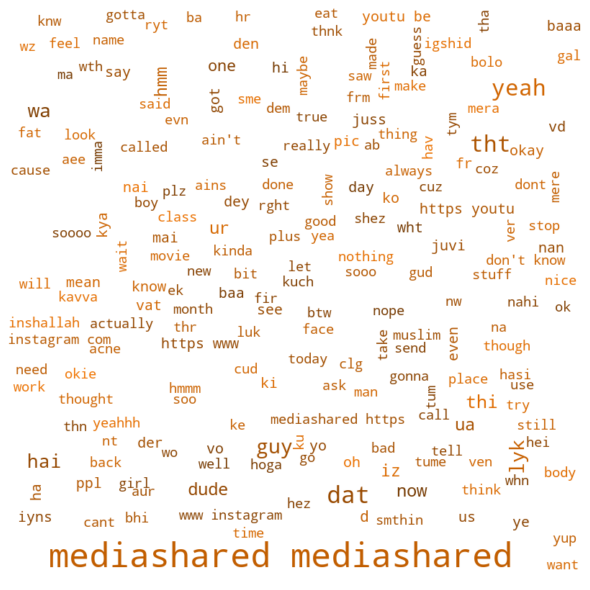

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud ,STOPWORDS


##converting chat.txt file to .csv file
##filename=
df=pd.read_csv(r"C:\Users\JShaikh\Downloads\Compressed\WhatsApp Chat with MDH.txt",header=None,error_bad_lines=False,encoding='utf8')
df= df.drop(0)
df.columns=['Date', 'Chat']
Message= df["Chat"].str.split("-", n = 1, expand = True) 
df['Date']=df['Date'].str.replace(",","") 
df['Time']=Message[0]
df['Text']=Message[1]
Message1= df["Text"].str.split(":", n = 1, expand = True) 
df['Text']=Message1[1]
df['Name']=Message1[0]
df=df.drop(columns=['Chat'])
df['Text']=df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('<media omitted>','MediaShared')
df['Text'] = df['Text'].str.replace('this message was deleted','DeletedMsg')    
df.to_csv("converted_csv.csv",index=False)

new_file=pd.read_csv("converted_csv.csv")
new_file.head()

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)
### making wordcloud
df1=pd.read_csv("converted_csv.csv" )
stopwords=set(STOPWORDS)

lyric_words=''.join(df1.Text.astype(str)).lower()

wordcloud= WordCloud(width=800,height=800,
                    background_color='white',
                    stopwords=stopwords,
                    min_font_size=10,color_func=random_color_func).generate(lyric_words)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()